## CV_Assignment_7
1. What is the COVARIATE SHIFT Issue, and how does it affect you?
2. What is the process of BATCH NORMALIZATION?
3. Using our own terms and diagrams, explain LENET ARCHITECTURE.
4. Using our own terms and diagrams, explain ALEXNET ARCHITECTURE.
5. Describe the vanishing gradient problem.
6. What is NORMALIZATION OF LOCAL RESPONSE?
7. In AlexNet, what WEIGHT REGULARIZATION was used?
8. Using our own terms and diagrams, explain VGGNET ARCHITECTURE.
9. Describe VGGNET CONFIGURATIONS.
10. What regularization methods are used in VGGNET to prevent overfitting?

In [1]:
'''Ans 1:- Covariate shift refers to a situation in machine learning where the
distribution of the input features (covariates) changes between training and test datasets.
It can negatively impact model performance as the model may struggle to
generalize to the new distribution. To mitigate covariate shift, data preprocessing
techniques like domain adaptation or importance weighting are used. Here's a simple code
example illustrating covariate shift. In this example, make_classification generates a
dataset with a shift in the feature distribution, simulating a covariate shift issue.'''

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with covariate shift
X, y = make_classification(n_samples=1000, n_features=20, shift=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
'''Ans 2:- Batch Normalization is a technique in deep learning that normalizes the input
of a layer by adjusting its mean and standard deviation, making training more
stable and accelerating convergence. Here's a simplified process.

1. For each mini-batch during training, compute the mean
and standard deviation.

2. Normalize the batch using the mean and standard deviation.

3. Scale and shift the normalized batch using learnable parameters.

4. Apply the scaled and shifted batch as input to the next layer.

In this example, Batch Normalization is applied after the first dense layer in
the neural network, helping stabilize training and improve convergence.'''

import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Define a neural network with Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [4]:
'''Ans 3:-  LeNet is an early convolutional neural network (CNN) architecture designed
for handwritten digit recognition. It consists of seven layers, including two
convolutional layers followed by pooling layers and fully connected layers.

1. Convolution Layer 1: Detects simple patterns.
2. Pooling Layer 1: Reduces spatial dimensions.
3. Convolution Layer 2: Detects more complex patterns.
4. Pooling Layer 2: Further reduces spatial dimensions.
5. Flatten Layer: Converts the 2D output into a 1D vector.
6. Fully Connected Layer 1: Learns high-level features.
7. Fully Connected Layer 2: Produces final classification.

This hierarchical design allows LeNet to recognize features at multiple
levels, making it effective for image classification tasks.'''

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# LeNet model
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape input data for convolutional layers
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Print the training history
print("Training History:")
print(history.history)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1993 - accuracy: 0.9398 - val_loss: 0.0646 - val_accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0447 - val_accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0358 - val_accuracy: 0.9886
Training History:
{'loss': [0.19925327599048615, 0.05975453183054924, 0.04395468905568123, 0.03528181463479996, 0.028596309944987297], 'accuracy': [0.9398000240325928, 0.9818500280380249, 0.9862666726112366, 0.9886999726295471, 0.9912999868392944], 'val_loss': [0.0646322295069694

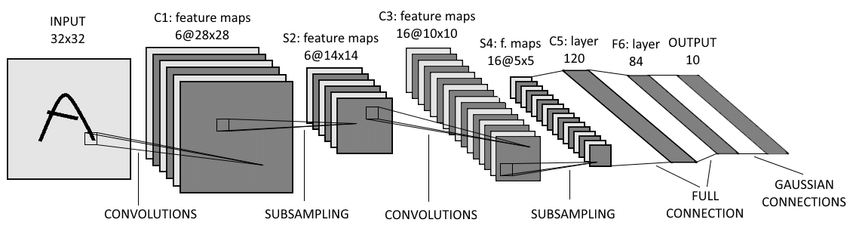

In [6]:
'''Ans 4:- AlexNet is a pioneering convolutional neural network (CNN) architecture
designed for image classification tasks. It comprises five convolutional layers
followed by three fully connected layers. It uses rectified linear units (ReLUs) for
activation and employs techniques like dropout and local response normalization for
regularization. AlexNet's innovation lies in its deep architecture, which enables high-level
feature extraction and hierarchical learning, making it a pivotal model in the deep
learning revolution.

It is a simplified AlexNet model using TensorFlow/Keras, preparing some random
data for training, and training the model for a few epochs.
AlexNet was originally designed for the ImageNet dataset, which has 1,000
classes. In this case we use Sequential model from keras as alexnet 
is no more available in tensorflow library.

'''
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Sample data: Create random data for demonstration
num_samples = 1000
input_shape = (224, 224, 3)
num_classes = 10

# Create random data for input
x_train = np.random.rand(num_samples, *input_shape)
y_train = np.random.randint(num_classes, size=num_samples)

# Preprocess the data (you should use real data preprocessing)
x_train = keras.applications.imagenet_utils.preprocess_input(x_train)

# Create a simplified CNN model (not AlexNet)
model = keras.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (this is a simplified example with random data)
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Generate predictions (not meaningful with random data)
predictions = model.predict(x_train[:5])
print(predictions)

Epoch 1/10
32/32 [==============================] - 38s 1s/step - loss: 3.8898 - accuracy: 0.1020
Epoch 2/10
32/32 [==============================] - 37s 1s/step - loss: 2.3016 - accuracy: 0.1140
Epoch 3/10
32/32 [==============================] - 42s 1s/step - loss: 2.3021 - accuracy: 0.1140
Epoch 4/10
32/32 [==============================] - 39s 1s/step - loss: 2.3019 - accuracy: 0.1140
Epoch 5/10
32/32 [==============================] - 38s 1s/step - loss: 2.3025 - accuracy: 0.1070
Epoch 6/10
32/32 [==============================] - 38s 1s/step - loss: 2.3012 - accuracy: 0.1090
Epoch 7/10
32/32 [==============================] - 39s 1s/step - loss: 2.3007 - accuracy: 0.1100
Epoch 8/10
32/32 [==============================] - 40s 1s/step - loss: 2.3027 - accuracy: 0.1160
Epoch 9/10
32/32 [==============================] - 45s 1s/step - loss: 2.3019 - accuracy: 0.1150
Epoch 10/10
1/1 [==============================] - 0s 349ms/step
[[0.10240508 0.11299503 0.0897586  0.10339639 0.10876

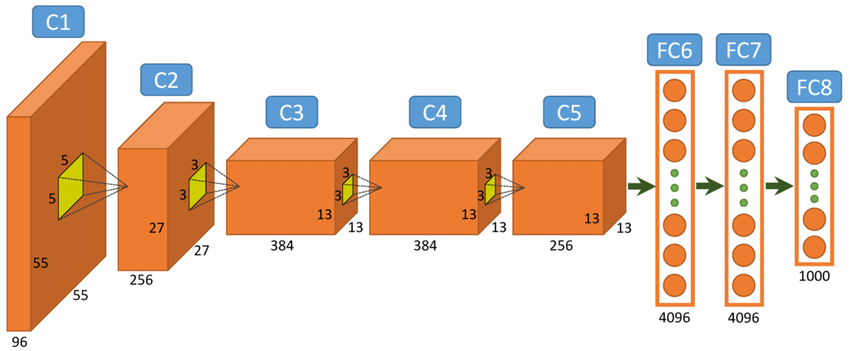

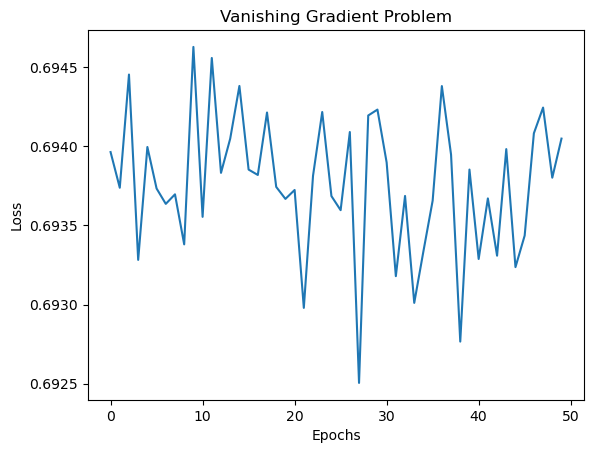

In [7]:
'''Ans 5:- The vanishing gradient problem is an issue in deep neural networks where
gradients (sensitivities) of the loss function become extremely small as they are
back-propagated through many layers. This makes it challenging for early layers to learn
effectively, causing slow or stalled training and poor convergence. Activation functions
like sigmoid and tanh exacerbate this problem because their derivatives are small
in certain input ranges, hampering weight updates during training.

In this code, we create a deep neural network with three hidden layers using
the sigmoid activation function. we notice that as the network trains, the loss
curve may decrease very slowly due to the vanishing gradient problem associated with
the sigmoid activation function.'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate synthetic data
num_samples = 1000
input_dim = 10

X = np.random.randn(num_samples, input_dim)
y = np.random.randint(0, 2, size=num_samples)

# Create a deep neural network with sigmoid activation
model = keras.Sequential([
    layers.Dense(100, activation='sigmoid', input_dim=input_dim),
    layers.Dense(100, activation='sigmoid'),
    layers.Dense(100, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy')

# Train the model
history = model.fit(X, y, epochs=50, verbose=0)

# Plot the loss curve to observe vanishing 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Vanishing Gradient Problem')
plt.show()

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 2.3422 - accuracy: 0.1300
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.3156 - accuracy: 0.1300
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.3004 - accuracy: 0.1400
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2856 - accuracy: 0.1400
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2753 - accuracy: 0.1500
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2668 - accuracy: 0.1500
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2582 - accuracy: 0.1600
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2507 - accuracy: 0.1300
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2441 - accuracy: 0.1600
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2365 - accuracy: 0.1400


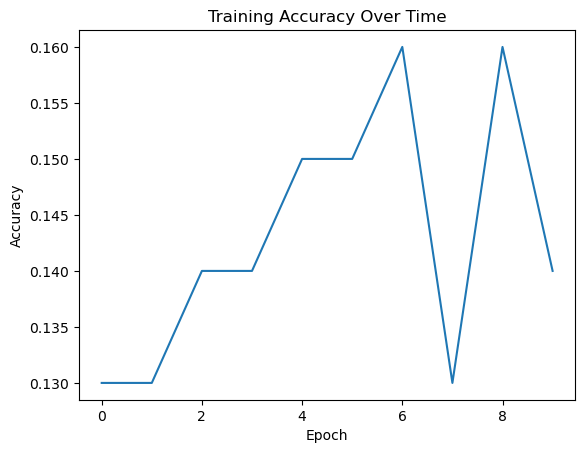

In [10]:
'''Ans 6:- Normalization of Local Response, also known as Local Response Normalization
(LRN), is a technique in deep neural networks to enhance the activation of neurons.
It involves normalizing the activity of a neuron in relation to its neighboring
neurons within a local receptive field. LRN helps neurons with higher activation to
inhibit their neighbors, promoting the detection of broader and more pronounced
features in convolutional neural networks, particularly beneficial for image
recognition tasks.'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Sample data and labels
input_shape = (5, 5, 3)
num_classes = 10

X = np.random.rand(100, *input_shape)
y = np.random.randint(num_classes, size=100)

# Define a custom LRN layer
class LRNLayer(layers.Layer):
    def __init__(self, alpha=1e-4, beta=0.75, k=1, **kwargs):
        super(LRNLayer, self).__init__(**kwargs)
        self.alpha = alpha
        self.beta = beta
        self.k = k

    def call(self, inputs):
        return tf.nn.local_response_normalization(inputs, depth_radius=self.k, alpha=self.alpha, beta=self.beta)

# Create a simple model with an LRN layer
model = keras.Sequential([
    layers.Input(shape=input_shape),
    LRNLayer(alpha=1e-4, beta=0.75, k=1),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and record training history
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.show()

In [ ]:
'''Ans 7:- In AlexNet, weight regularization techniques such as L2 regularization (also
known as weight decay) were used to prevent overfitting. L2 regularization adds a
penalty term to the loss function, encouraging the model to have smaller weights. This
helps control the complexity of the model and reduces the risk of overfitting by
discouraging large weight values. It played a crucial role in improving the generalization
performance of the deep network, contributing to the success of AlexNet in the ImageNet
competition.'''

In [ ]:
'''Ans 8:- The VGGNet architecture is a deep convolutional neural network known for its
simplicity and effectiveness in image classification. It consists of a series of
convolutional layers with small 3x3 filters and max-pooling layers. VGGNet comes in two main
configurations, VGG16 and VGG19, which have 16 and 19 weight layers, respectively. The network
architecture consists of multiple convolutional blocks followed by fully connected layers,
making it deep and capable of capturing intricate image features. VGGNet's uniform
structure facilitates ease of understanding and transferability to other tasks.'''

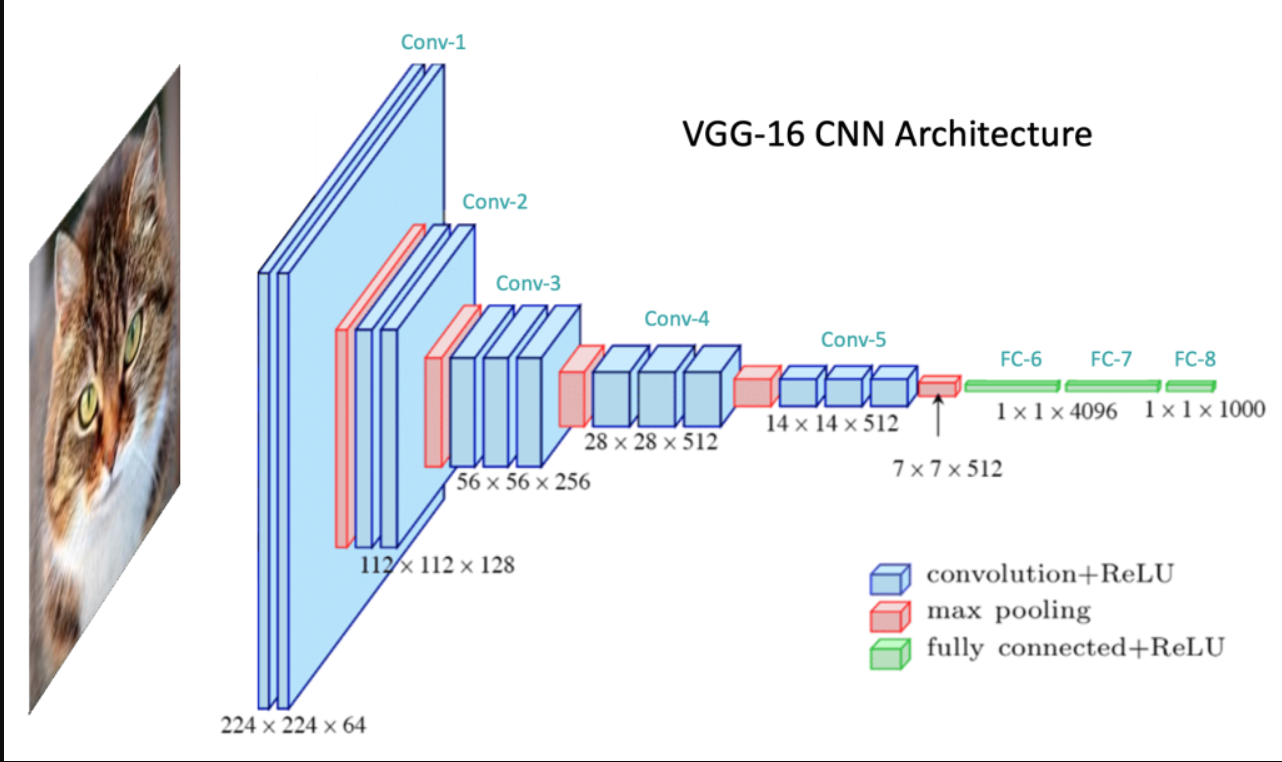

In [14]:
'''Ans 9:- VGGNet is a deep convolutional neural network known for its simplicity and
effectiveness. It has different configurations, including VGG16 and VGG19. VGG16 has 16
weight layers, while VGG19 has 19. Each configuration consists of convolutional
layers with small 3x3 filters and max-pooling layers. This code demonstrates the
VGG16 architecture in Keras for image classification.'''

from tensorflow import keras
from tensorflow.keras import layers

# Sample data and input shape
input_shape = (224, 224, 3)
num_classes = 1000  # For ImageNet

# Create a VGG16 model
model = keras.Sequential([
    layers.Input(shape=input_shape),
    
    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Block 4
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Block 5
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_52 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_54 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                               

Epoch 1/10
7/7 [==============================] - 2s 164ms/step - loss: 2.4155 - accuracy: 0.1200
Epoch 2/10
7/7 [==============================] - 1s 145ms/step - loss: 2.2792 - accuracy: 0.1300
Epoch 3/10
7/7 [==============================] - 1s 151ms/step - loss: 2.2833 - accuracy: 0.1900
Epoch 4/10
7/7 [==============================] - 1s 152ms/step - loss: 2.2498 - accuracy: 0.1600
Epoch 5/10
7/7 [==============================] - 1s 145ms/step - loss: 2.2721 - accuracy: 0.1600
Epoch 6/10
7/7 [==============================] - 1s 149ms/step - loss: 2.2542 - accuracy: 0.1800
Epoch 7/10
7/7 [==============================] - 1s 145ms/step - loss: 2.2590 - accuracy: 0.1800
Epoch 8/10
7/7 [==============================] - 1s 148ms/step - loss: 2.2318 - accuracy: 0.1700
Epoch 9/10
7/7 [==============================] - 1s 147ms/step - loss: 2.2232 - accuracy: 0.2000
Epoch 10/10
7/7 [==============================] - 1s 163ms/step - loss: 2.2182 - accuracy: 0.2000


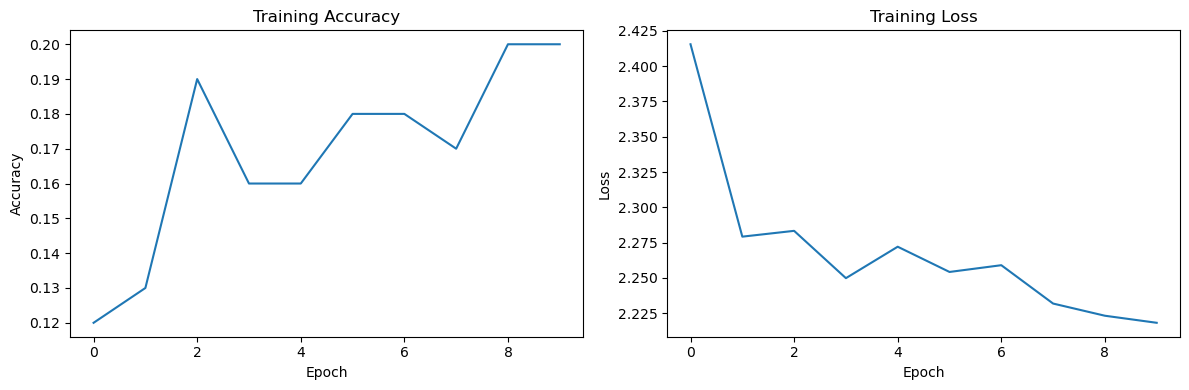

In [17]:
'''Ans 10:- In VGGNet, weight decay or L2 regularization is primarily employed to mitigate
overfitting. This technique adds a penalty term to the loss function, encouraging the model
to have smaller weight values. This regularization method effectively controls
model complexity by discouraging excessively large weights. While VGGNet doesn't
include dropout, another popular regularization technique, its deep architecture with
smaller filter sizes inherently contributes to regularization by reducing the number
of parameters. These regularization strategies collectively help VGGNet
generalize well to diverse image classification tasks.'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Sample data and input shape
input_shape = (64, 64, 3)
num_classes = 10

X = np.random.rand(100, *input_shape)
y = np.random.randint(num_classes, size=100)

# simplified VGG-like model with smaller layer sizes
model = keras.Sequential([
    layers.Input(shape=input_shape),
    
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with reduced batch size and record training history
history = model.fit(X, y, epochs=10, batch_size=16, verbose=1)

# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()